In [1]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image as IMAGE
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os, os.path
import sys
import magic
import face_recognition as FR
np.random.seed(5)

Using TensorFlow backend.


In [2]:
model = load_model('./model2.h5')

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

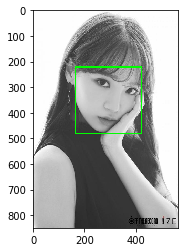

../Dataset/predict/Chaewon619.jpg : 김채원
------------------------------------------------------------


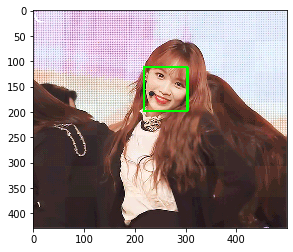

../Dataset/predict/Chaewon640.gif : 김채원
------------------------------------------------------------


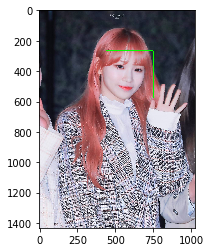

../Dataset/predict/Chaewon654.jpg : 김채원
------------------------------------------------------------


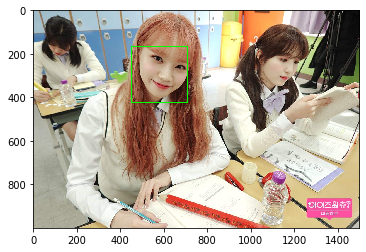

../Dataset/predict/Chaewon667.jpg : 김채원
------------------------------------------------------------


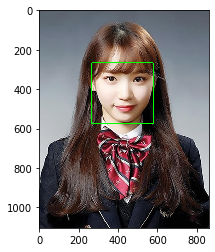

../Dataset/predict/Chaewon680.jpg : 김채원
------------------------------------------------------------


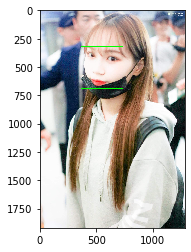

../Dataset/predict/Chaewon694.jpg : 김채원
------------------------------------------------------------


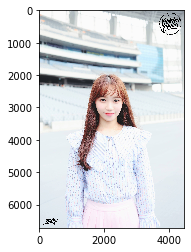

../Dataset/predict/Chaewon707.jpg : 김채원
------------------------------------------------------------


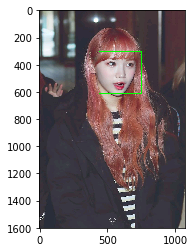

../Dataset/predict/Chaewon719.jpg : 김채원
------------------------------------------------------------


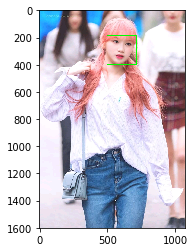

../Dataset/predict/Chaewon736.jpg : 김채원
------------------------------------------------------------


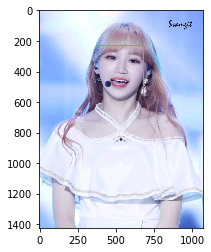

../Dataset/predict/Chaewon748.jpg : 김채원
------------------------------------------------------------


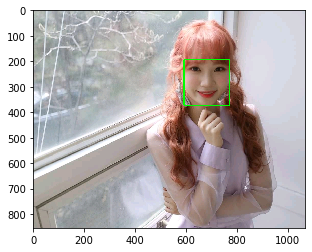

../Dataset/predict/Chaewon762.jpg : 김채원
------------------------------------------------------------


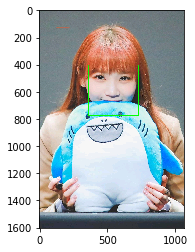

../Dataset/predict/Chaewon778.jpg : 김채원
------------------------------------------------------------


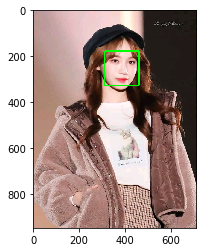

../Dataset/predict/Chaewon793.jpg : 김채원
------------------------------------------------------------


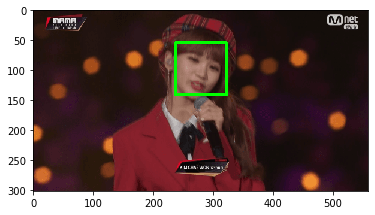

../Dataset/predict/Chaewon806.gif : 김채원
------------------------------------------------------------


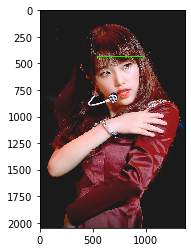

../Dataset/predict/Yaena336.jpg : 최예나
------------------------------------------------------------


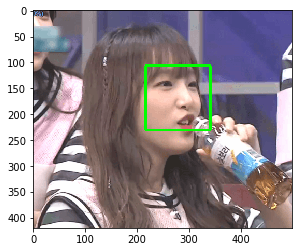

../Dataset/predict/Yaena365.gif : 김채원
------------------------------------------------------------


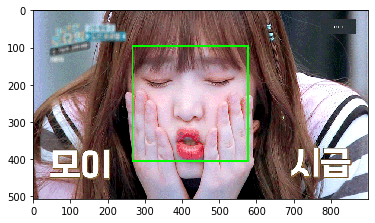

../Dataset/predict/Yaena386.gif : 최예나
------------------------------------------------------------


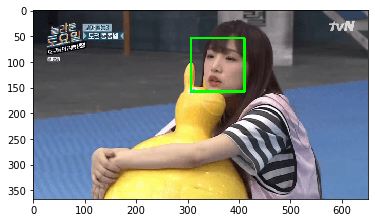

../Dataset/predict/Yaena418.gif : 최예나
------------------------------------------------------------


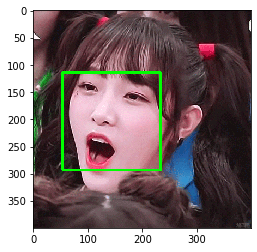

../Dataset/predict/Yaena433.gif : 최예나
------------------------------------------------------------


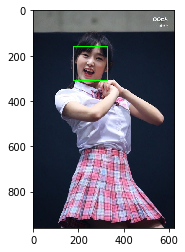

../Dataset/predict/Yaena448.jpg : 조유리
------------------------------------------------------------


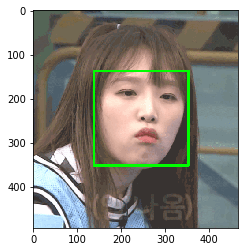

../Dataset/predict/Yaena467.gif : 조유리
------------------------------------------------------------


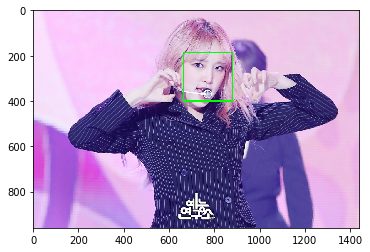

../Dataset/predict/Yaena484.jpg : 최예나
------------------------------------------------------------


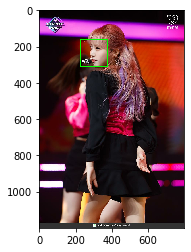

../Dataset/predict/Yaena499.jpg : 김채원
------------------------------------------------------------


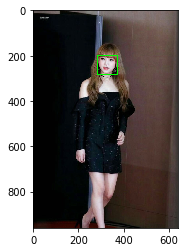

../Dataset/predict/Yaena515.jpg : 최예나
------------------------------------------------------------


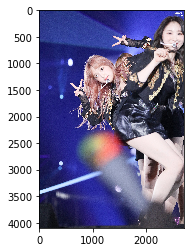

../Dataset/predict/Yaena529.jpg : 김채원
------------------------------------------------------------


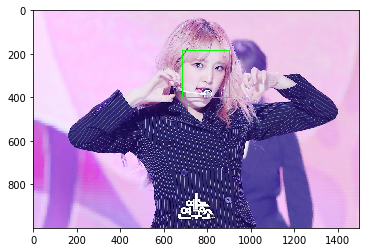

../Dataset/predict/Yaena553.jpg : 최예나
------------------------------------------------------------


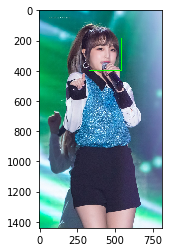

../Dataset/predict/Yaena568.jpg : 조유리
------------------------------------------------------------


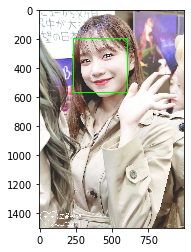

../Dataset/predict/Yuri441.jpg : 김채원
------------------------------------------------------------


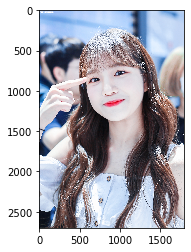

../Dataset/predict/Yuri453.png : 김채원
------------------------------------------------------------


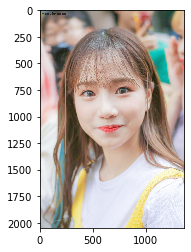

../Dataset/predict/Yuri472.jpg : 조유리
------------------------------------------------------------


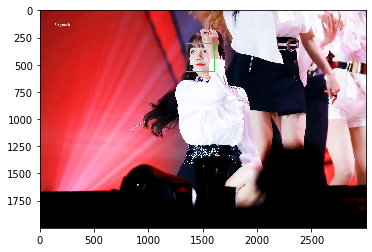

../Dataset/predict/Yuri491.jpg : 조유리
------------------------------------------------------------


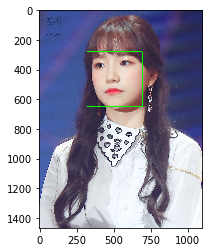

../Dataset/predict/Yuri506.jpg : 조유리
------------------------------------------------------------


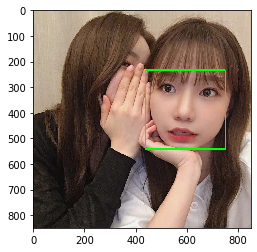

../Dataset/predict/Yuri519.jpg : 김채원
------------------------------------------------------------


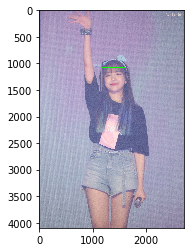

../Dataset/predict/Yuri533.jpg : 김채원
------------------------------------------------------------


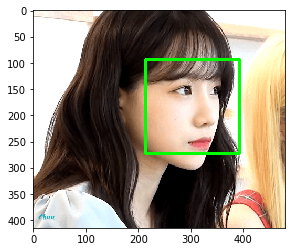

../Dataset/predict/Yuri552.gif : 조유리
------------------------------------------------------------


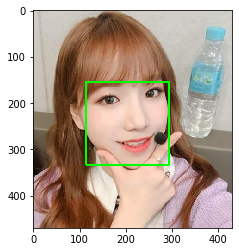

../Dataset/predict/Yuri566.jpg : 김채원
------------------------------------------------------------


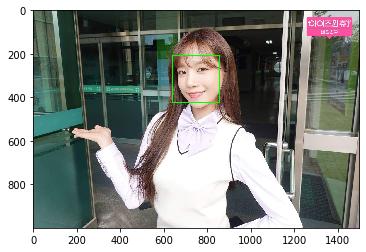

../Dataset/predict/Yuri580.jpg : 김채원
------------------------------------------------------------


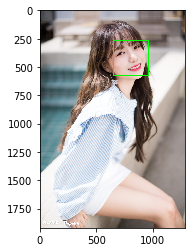

../Dataset/predict/Yuri596.jpg : 조유리
------------------------------------------------------------


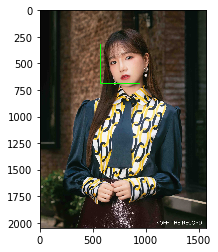

../Dataset/predict/Yuri608.jpg : 조유리
------------------------------------------------------------


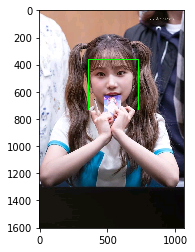

../Dataset/predict/Yuri622.jpg : 조유리
------------------------------------------------------------


In [4]:
predictPath = '../Dataset/predict/'
imageList = os.listdir(predictPath)
predictList = ['김채원', '최예나', '조유리']
for predictImage in imageList:
    extention = magic.from_file(predictPath+predictImage).split()[0].upper()
    if extention == 'GIF':
        imageObject = Image.open(predictPath+predictImage)
        imageObject.seek(0) 
        imageObject = imageObject.convert('RGB')
        image = np.array(imageObject)
    elif extention != 'JPEG' and extention != 'PNG':
        continue
    else:
        image = FR.load_image_file(predictPath+predictImage)

    faces = FR.face_locations(image, number_of_times_to_upsample=0, model="hog")
    if len(faces) != 1 :
        print('fail to find : multi faces')
        continue
    T, R, B, L = faces[0]
    crop  = image[T:B, L:R]
    faceImage = cv2.resize(crop, (128, 128),interpolation = cv2.INTER_CUBIC)
    for (T, R, B, L) in faces:
        cv2.rectangle(image, (L, T), (R, B), (0, 255, 0), 4)
    plt.imshow(image)
    plt.show()
    x = IMAGE.img_to_array(faceImage)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images)
    print(predictPath+predictImage+" : " +predictList[classes[0]])
    print('------------------------------------------------------------')